# Etude des trajectoires

In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
def show(df):
    plt.plot(df['X'], df['Y'], 'r')

    min_x = min(df['X'])
    max_x = max(df['X'])

    min_y = min(df['Y'])
    max_y = max(df['Y'])
    plt.axis([min_x - 20, max_x + 20, min_y - 20, max_y + 20])
    return plt

In [3]:
file = open("Data/Example.txt", "r")
file.readline() # on ignore la première ligne
X, Y, id_traj_from_file = [], [], []
for line in file:
    data = re.split('\s', line)
    id_traj_from_file.append(int(data[0]))
    X.append(float(data[2]))
    Y.append(float(data[3]))
df = pd.DataFrame(
    {
        "id": id_traj_from_file,
        "X": X,
        "Y": Y
    }
)

## Observations
### Voici quelques trajectoires supposées juste :

In [4]:
df_ref = []
df_ref.append(df.loc[df['id']==31])
df_ref.append(df.loc[df['id']==32])
df_ref.append(df.loc[df['id']==33])
df_ref.append(df.loc[df['id']==35])
df_ref.append(df.loc[df['id']==37])
df_ref.append(df.loc[df['id']==43])

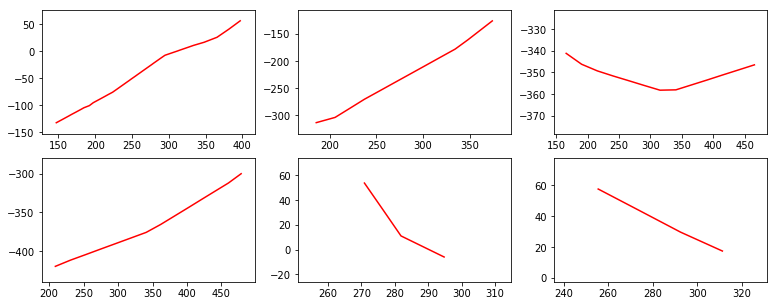

In [5]:
plt.figure(figsize=(13, 5))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    show(df_ref[i-1])

### Et voici celles supposées erronées :

In [6]:
df_err = []
df_err.append(df.loc[df['id']==28])
df_err.append(df.loc[df['id']==29])
df_err.append(df.loc[df['id']==30])
df_err.append(df.loc[df['id']==40])
df_err.append(df.loc[df['id']==41])
df_err.append(df.loc[df['id']==42])

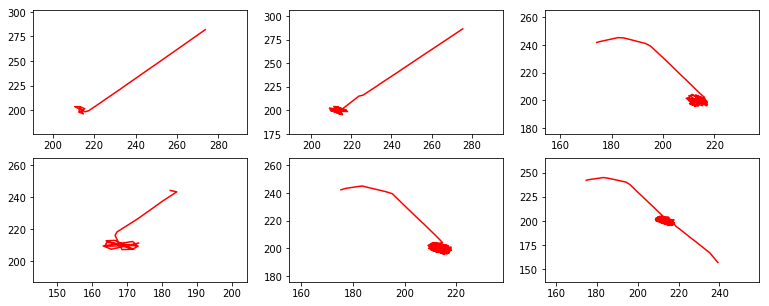

In [7]:
plt.figure(figsize=(13, 5))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    show(df_err[i-1])

### Remarques
Au vu des ces trajectoires erronées, nous pouvons observer une concentration importante de points a un endroit donné. Celle-ci révèle que la détection s'est male tournée.
Contrairement aux trajectoires justes, qui semblent avoir une courbe continue, c'est-à-dire sans perturbements.

### Hypothèses
L'idée ici est de comparer l'angle formé par deux vecteurs de points.
Pour cela nous allons utiliser le Produit scalaire.

#### Exemple
Soit un point A et B tel que 

$\begin{pmatrix}
2 & 3 & 1 \\
0.5 & 2 & -1 \\
-1 & 5 & -7
\end{pmatrix}$

#### Petit rappel sur les produits scalaires
Soit deux vecteurs `A` et `b`, le produit scalaire de ceux deux vecteurs est :

$\overrightarrow{A} \cdot \overrightarrow{B} = ||\overrightarrow{A}|| * ||\overrightarrow{B}|| * \cos( \overrightarrow{A} , \overrightarrow{B} )$

Soit
         
$\cos( \overrightarrow{A} , \overrightarrow{B} ) = \dfrac{\overrightarrow{A} \cdot \overrightarrow{B}}{||\overrightarrow{A}|| \cdot ||\overrightarrow{B}||}$

Soit

$
\angle \overrightarrow{A},\overrightarrow{B} = \arccos \Bigg(\dfrac{\overrightarrow{A} \cdot \overrightarrow{B}}{||\overrightarrow{A}|| \cdot ||\overrightarrow{B}||}\Bigg)
$
